## Load in the data from our SQL database

In [1]:
# import libraries
import psycopg2
import pandas as pd

# get username and password for DB
from config import sql_u
from config import sql_pw
from config import sql_host


In [2]:
# connect to DB
conn = psycopg2.connect(
    host=sql_host,
    port='5432',
    database='postgres',
    user=sql_u,
    password=sql_pw)

cur = conn.cursor()

In [3]:
# run query
sql_query = '''SELECT *
               FROM recipes;
            '''

cur.execute(sql_query)

In [4]:
# convert query results to DF
recipes_df = pd.DataFrame(cur.fetchall())
# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
recipes_df.columns = col_names
recipes_df.head()

,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,...,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,userid
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,0.0,Specific Gravity,All Grain,0.0,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.07,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,0.0,70.0,0.0,Specific Gravity,extract,0.0,0.0,0,0,0.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,...,0.0,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.0,1.06,1.01,6.48,17.84,...,1.05,72.0,0.0,Specific Gravity,All Grain,0.0,19.0,Sukkerlake,6-7 g sukker/l,18325.0


In [5]:
# run query
sql_query = '''SELECT *
               FROM styles;
            '''

cur.execute(sql_query)

# convert query results to DF
styles_df = pd.DataFrame(cur.fetchall())
# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
styles_df.columns = col_names
styles_df.head()

,style,styleid
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5


In [6]:
# run query
sql_query = '''SELECT *
               FROM reviews;
            '''

cur.execute(sql_query)

# convert query results to DF
reviews_df = pd.DataFrame(cur.fetchall())
# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
reviews_df.columns = col_names
reviews_df.head()

,id,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,0,Närke Kulturbryggeri AB,Old Ale,10902.0,4.0,4.5,4.0,4.0,4.5,8.2,57645,! (Old Ale),1.0
1,1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,4.0,4.0,4.0,4.0,4.4,10.0,49236,100,5.0
2,2,Aviator Brewing Company,American IPA,18635.0,4.0,4.0,3.5,4.0,4.0,6.6,50696,100 Pale Ale,1.0
3,3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,4.0,3.5,4.25,4.75,4.5,9.0,44353,12 Belgian Golden Strong Ale,2.0
4,4,Baltika-Baku,Dortmunder / Export Lager,13640.0,3.0,3.0,3.0,3.1666666666666665,3.0,4.8,30080,33 Export,3.0


In [7]:
# close sql connection
cur.close()
conn.close()

## Now that we have data in dataframes, let's try to put it together

In [8]:
# take a look at the reviews table
reviews_df.head()

,id,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,0,Närke Kulturbryggeri AB,Old Ale,10902.0,4.0,4.5,4.0,4.0,4.5,8.2,57645,! (Old Ale),1.0
1,1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,4.0,4.0,4.0,4.0,4.4,10.0,49236,100,5.0
2,2,Aviator Brewing Company,American IPA,18635.0,4.0,4.0,3.5,4.0,4.0,6.6,50696,100 Pale Ale,1.0
3,3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,4.0,3.5,4.25,4.75,4.5,9.0,44353,12 Belgian Golden Strong Ale,2.0
4,4,Baltika-Baku,Dortmunder / Export Lager,13640.0,3.0,3.0,3.0,3.1666666666666665,3.0,4.8,30080,33 Export,3.0


In [9]:
# rename column in styles_df to match reviews_df
styles_df = styles_df.rename(columns = {"style": "beer_style"})
styles_df.head()

,beer_style,styleid
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5


In [10]:
# merge the styles and reviews tables on the matching column name (key)
left = reviews_df
right = styles_df

df = pd.merge(left, right, how = 'inner', on="beer_style")

In [11]:
# take a look at the merged dataframe
df.head()

,id,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count,styleid
0,0,Närke Kulturbryggeri AB,Old Ale,10902.0,4.0,4.5,4.0,4.0,4.5,8.2,57645,! (Old Ale),1.0,116
1,6,Bootlegger's Brewery,Old Ale,17271.0,4.0,4.166666666666667,3.6666666666666665,4.0,4.166666666666667,7.599999999999999,51029,76 Anniversary Ale,3.0,116
2,7,Bootlegger's Brewery,Old Ale,17271.0,4.0,4.0,3.5,4.0,4.5,7.6,55510,76 Anniversary Ale With English Hops,1.0,116
3,44,Hair of the Dog Brewing Company / Brewery and ...,Old Ale,173.0,4.0,4.0,4.0,4.0,4.5,10.0,460,#29 Spawn Of Adam Bier,1.0,116
4,155,La Gueule de Bois,Old Ale,21985.0,3.3333333333333335,3.0,3.6666666666666665,3.5,2.8333333333333335,5.0,55689,1001 Bandits,3.0,116


In [12]:
# take a look at the recipes table
recipes_df.head()

,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,...,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,userid
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,0.0,Specific Gravity,All Grain,0.0,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.07,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,0.0,70.0,0.0,Specific Gravity,extract,0.0,0.0,0,0,0.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,...,0.0,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.0,1.06,1.01,6.48,17.84,...,1.05,72.0,0.0,Specific Gravity,All Grain,0.0,19.0,Sukkerlake,6-7 g sukker/l,18325.0


In [13]:
# Can I find all the rows that are "clones" of a beer for which we have information?
clone_df = recipes_df[recipes_df["name"].str.contains("Clone|clone")]
clone_df.head()


,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,...,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,userid
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.07,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,0.0,70.0,0.0,Specific Gravity,extract,0.0,0.0,0,0,0.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,...,0.0,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79.0,0.0,Specific Gravity,All Grain,1.0,0.0,0,0,5889.0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.04,70.0,1.4,Specific Gravity,All Grain,0.0,0.0,corn sugar,4.2 oz,116.0


In [14]:
# take a look at the beer names in reviews_df
reviews_df["beer_name"]

0                             ! (Old Ale)
1                                     100
2                            100 Pale Ale
3           12  Belgian Golden Strong Ale
4                               33 Export
                       ...               
48760    Žamberecký Kanec Imperial Stout
48761              Ω-naught (Omeganaught)
48762                  “Chewy” Double IPA
48763          横須賀ビアサケ (Yokosuka Biasake)
48764                 葉山ビール (Hayama Beer)
Name: beer_name, Length: 48765, dtype: object

In [15]:
# take a look at the beer names in the clone_df (from recipes)
clone_df["name"]

1                         Southern Tier Pumking clone
2                         Zombie Dust Clone - EXTRACT
3                       Zombie Dust Clone - ALL GRAIN
5                        Sierra Nevada Pale Ale Clone
7        Spotted Clown (New Glarus Spotted Cow clone)
                             ...                     
73730                             Sierra nevada clone
73786                           Stone Ruination Clone
73795                                 Full Sail Clone
73811                                Jackhammer clone
73860                           Elvis Juice IPA Clone
Name: name, Length: 2920, dtype: object

In [16]:
# take out the word 'clone' in the clone_df beer names
pd.options.mode.chained_assignment = None
remove = ["Clone", "clone", "clone)", "(clone"]
f = lambda x: ' '.join([item for item in x.split() if item not in remove])
clone_df["name"] = clone_df["name"].apply(f)

# check that "clone" was removed
# these are the beer names in the recipes table
clone_df["name"].sample(15)


1970                        Exit 11 Extract
38136                                   SOS
55466                     Brown Bonnie v1.0
72331                           Barn Burner
28250                              HopHands
764      Goose Island Brewery - Honkers Ale
68265                  Hop hands (pale ale)
47475                              Old Chub
52284                     Victory Dirt Wolf
71220             NC Sierra Nevada Pale Ale
44544                              Maharaja
15996                 SN Bigfoot Barleywine
49933              Three Floyds Zombie Dust
2737                       - Wanderlust IPA
64595                                Tank 7
Name: name, dtype: object

In [17]:
# take a look at the beer names in the reviews table
reviews_df["beer_name"].sample(15)

13722             Dragonmead Dragon Daze Hemp Ale
8549     Buckeye Brewing Zatek (espresso Infused)
22347                                Imperial Rye
10244                                 Cherry Luna
15924                               Festive Brune
6327                             Blackberry Wheat
32599                            Outlaw - Nit-Wit
25280                      La Choulette Framboise
27789                         Marlen Beer De Luxe
38514                             Schleppe Märzen
1512                        Allagash Lyon's Folly
34124                      Pistol Whip Bitter Ale
116                      0% Brett Saison De Lente
28497                              Midnight Lager
8207                           Brooklyn Black OPS
Name: beer_name, dtype: object

In [18]:
# Create a dataframe of just the beer names
recipe_names = clone_df[["name"]]
review_names = reviews_df[["beer_name"]]

In [19]:
# Do we have any matches?
recipe_names.name.isin(review_names.beer_name).astype(int)

1        0
2        0
3        0
5        1
7        0
        ..
73730    0
73786    0
73795    0
73811    0
73860    0
Name: name, Length: 2920, dtype: int32

In [20]:
matches_df = recipe_names.assign(review_names=recipe_names.name.isin(review_names.beer_name).astype(int))
# matches_df.head()

In [21]:
matches_df = matches_df.loc[matches_df['review_names'] == 1]
matches_df.head(25)

,name,review_names
5,Sierra Nevada Pale Ale,1
23,Lagunitas IPA,1
25,Dale's Pale Ale,1
43,Coors Light,1
62,Founders Porter,1
102,Bud Light,1
112,Brooklyn Lager,1
120,Delirium Tremens,1
124,Sierra Nevada Pale Ale,1
126,Founders All Day IPA,1


In [22]:
# How many matches do we have?
len(matches_df)

465

In [23]:
# make a list of all the matching name brand beers for which we have a clone recipe
name_brand_beers = matches_df["name"]


In [24]:
# Select the name brand beers from the reviews_df
name_brand_reviews = reviews_df[reviews_df["beer_name"].isin(matches_df["name"])]
name_brand_reviews = name_brand_reviews.rename(columns = {"beer_name": "name"})
name_brand_reviews.head()

,id,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,name,review_count
200,199,Dogfish Head Brewery,American Double / Imperial IPA,10099.0,3.5494791666666665,4.002314814814815,4.031828703703703,3.8932291666666665,3.9207175925925926,18.0,9086,120 Minute IPA,1728.0
650,650,Wadworth and Company Ltd.,English Pale Ale,2749.0,3.441860465116279,3.372093023255814,3.627906976744186,3.4186046511627906,3.453488372093023,4.3,8364,6X,43.0
1007,1007,Perennial Artisan Ales,American Double / Imperial Stout,25888.0,4.3,4.2,4.1,4.5,4.3,10.0,76393,Abraxas,5.0
1265,1265,Alaskan Brewing Co.,Altbier,429.0,3.8469387755102042,3.5010204081632654,3.6459183673469386,3.5581632653061224,3.6448979591836737,5.3,1309,Alaskan Amber,490.0
1273,1273,Alaskan Brewing Co.,American Brown Ale,429.0,4.0,4.333333333333333,4.0,3.6666666666666665,4.166666666666667,6.7,42097,Alaskan Heritage Coffee Brown Ale,3.0


In [25]:
# Select the name brand beers from the recipes_df
name_brand_recipes = recipes_df[recipes_df["name"].isin(matches_df["name"])]
name_brand_recipes.head()

,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,...,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,userid
22,23,Brooklyn Sorachi Ace,/homebrew/recipe/view/190892/brooklyn-sorachi-ace,Saison,134,18.93,1.082,1.013,9.1,0.0,...,0.0,72.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
90,91,Shiner Bock,/homebrew/recipe/view/45045/shiner-bock,Dark American Lager,52,20.82,1.043,1.011,4.14,13.22,...,0.0,85.0,0.0,Specific Gravity,All Grain,1.75,12.22,0,0,10445.0
208,209,Obsidian Stout,/homebrew/recipe/view/9037/obsidian-stout,American Stout,12,22.71,1.069,1.017,6.75,58.76,...,1.053,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
441,442,Fuller's London Pride,/homebrew/recipe/view/124539/fuller-s-london-p...,Special/Best/Premium Bitter,144,45.42,1.044,1.014,4.01,34.24,...,1.038,95.0,1.25,Specific Gravity,All Grain,1.0,19.44,0,0,5889.0
556,557,Fuller's ESB,/homebrew/recipe/view/57032/fuller-s-esb,Extra Special/Strong Bitter (ESB),68,42.0,1.06,1.019,5.42,25.73,...,0.0,75.0,0.0,Specific Gravity,All Grain,0.75,20.0,0,0,0.0


In [26]:
# merge the two dataframes
left = name_brand_recipes
right = name_brand_reviews

merged_name_brand = pd.merge(left, right, how = 'inner', on = "name")
merged_name_brand.head()

,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,...,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,review_count
0,23,Brooklyn Sorachi Ace,/homebrew/recipe/view/190892/brooklyn-sorachi-ace,Saison,134,18.93,1.082,1.013,9.1,0.0,...,Saison / Farmhouse Ale,45.0,4.159836065573771,4.079234972677596,4.1502732240437155,4.10792349726776,4.103825136612022,7.6,51480,366.0
1,6540,Brooklyn Sorachi Ace,/homebrew/recipe/view/226460/brooklyn-sorachi-ace,Saison,134,7.57,1.076,1.014,8.1,33.51,...,Saison / Farmhouse Ale,45.0,4.159836065573771,4.079234972677596,4.1502732240437155,4.10792349726776,4.103825136612022,7.6,51480,366.0
2,91,Shiner Bock,/homebrew/recipe/view/45045/shiner-bock,Dark American Lager,52,20.82,1.043,1.011,4.14,13.22,...,Bock,143.0,3.3202247191011236,2.8623595505617976,3.2280898876404494,2.993820224719101,3.0286516853932586,4.4,1352,890.0
3,209,Obsidian Stout,/homebrew/recipe/view/9037/obsidian-stout,American Stout,12,22.71,1.069,1.017,6.75,58.76,...,American Stout,63.0,4.249674054758801,4.077574967405476,4.303780964797914,4.121251629726206,4.265971316818774,6.4,197,767.0
4,14633,Obsidian Stout,/homebrew/recipe/view/209899/obsidian-stout,American Stout,12,22.71,1.068,1.018,6.53,73.4,...,American Stout,63.0,4.249674054758801,4.077574967405476,4.303780964797914,4.121251629726206,4.265971316818774,6.4,197,767.0


In [27]:
merged_name_brand.columns.tolist()

['beerid',
 'name',
 'url',
 'style',
 'styleid',
 'size_l',
 'og',
 'fg',
 'abv',
 'ibu',
 'color',
 'boilsize',
 'boiltime',
 'boilgravity',
 'efficiency',
 'mashthickness',
 'sugarscale',
 'brewmethod',
 'pitchrate',
 'primarytemp',
 'primingmethod',
 'primingamount',
 'userid',
 'id',
 'brewery_name',
 'beer_style',
 'brewery_id',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'beer_abv',
 'beer_beerid',
 'review_count']

In [152]:
# drop unnecessary columns
merged_nb_df = merged_name_brand.drop(columns = ["url", "userid", "id", "brewery_name", "brewery_id","review_overall", "beer_beerid", "beerid"])

In [153]:
# check out ALL the columns
pd.set_option('display.max_columns', None)
merged_nb_df.head()

,name,style,styleid,size_l,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,beer_style,review_aroma,review_appearance,review_palate,review_taste,beer_abv,review_count
0,Brooklyn Sorachi Ace,Saison,134,18.93,1.082,1.013,9.1,0.0,4.1,21.58,60,0.0,72.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,Saison / Farmhouse Ale,4.079234972677596,4.1502732240437155,4.10792349726776,4.103825136612022,7.6,366.0
1,Brooklyn Sorachi Ace,Saison,134,7.57,1.076,1.014,8.1,33.51,3.68,8.71,60,1.066,75.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,Saison / Farmhouse Ale,4.079234972677596,4.1502732240437155,4.10792349726776,4.103825136612022,7.6,366.0
2,Shiner Bock,Dark American Lager,52,20.82,1.043,1.011,4.14,13.22,17.67,28.39,90,0.0,85.0,0.0,Specific Gravity,All Grain,1.75,12.22,0,0,Bock,2.8623595505617976,3.2280898876404494,2.993820224719101,3.0286516853932586,4.4,890.0
3,Obsidian Stout,American Stout,12,22.71,1.069,1.017,6.75,58.76,40.0,29.34,90,1.053,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,American Stout,4.077574967405476,4.303780964797914,4.121251629726206,4.265971316818774,6.4,767.0
4,Obsidian Stout,American Stout,12,22.71,1.068,1.018,6.53,73.4,40.0,27.44,90,1.056,65.0,1.3,Specific Gravity,All Grain,1.25,18.89,Dextrose,0,American Stout,4.077574967405476,4.303780964797914,4.121251629726206,4.265971316818774,6.4,767.0


In [154]:
# Change numerical columns from object to float
num_columns = ['styleid', 'size_l', 'og', 'fg', 'abv', 'ibu', 'color',
       'boilsize', 'boiltime', 'boilgravity', 'efficiency', 'mashthickness',
       'pitchrate', 'primarytemp', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste', 'beer_abv', 'review_count']

for col in num_columns:
    merged_nb_df[col] = merged_nb_df[col].astype(float)


## Let's make some plots!

In [155]:
# Let's make some plots!
import matplotlib.pyplot as plt
import numpy as np


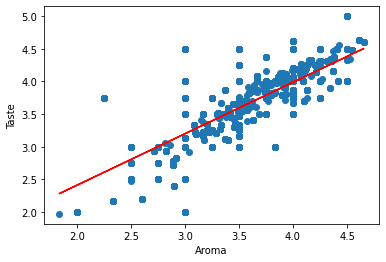

In [156]:
# Graph Taste vs. Aroma
x = merged_nb_df["review_aroma"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
plt.scatter(x,y)
plt.xlabel('Aroma')
plt.ylabel('Taste')
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b, color = 'red')
plt.show()

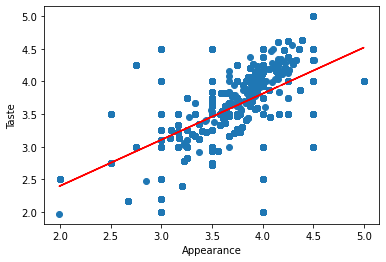

In [157]:
# Graph Taste vs. Appearance
x = merged_nb_df["review_appearance"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel('Appearance')
plt.ylabel('Taste')
plt.plot(x,m*x+b, color = 'red')

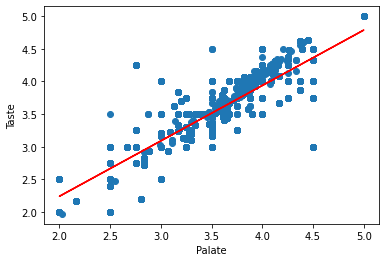

In [158]:
# Graph Taste vs. Palate
x = merged_nb_df["review_palate"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel('Palate')
plt.ylabel('Taste')
plt.plot(x,m*x+b, color = 'red')

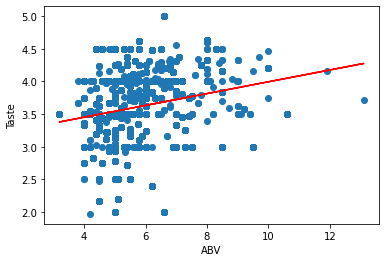

In [159]:
# Graph Taste vs. ABV
x = merged_nb_df["beer_abv"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel('ABV')
plt.ylabel('Taste')
plt.plot(x,m*x+b, color = 'red')

# Very little correlation (see below)

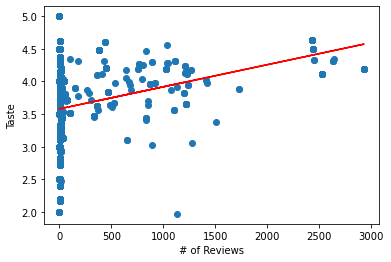

In [160]:
# Are beers with more reviews also better tasting?

x = merged_nb_df["review_count"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel('# of Reviews')
plt.ylabel('Taste')
plt.plot(x,m*x+b, color = 'red')

# NOPE (see below)

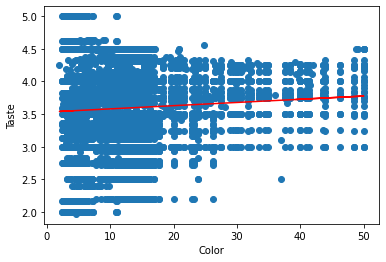

In [161]:
# Are color and taste related?

x = merged_nb_df["color"]
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel('Color')
plt.ylabel('Taste')
plt.plot(x,m*x+b, color = 'red')

# I don't think so...

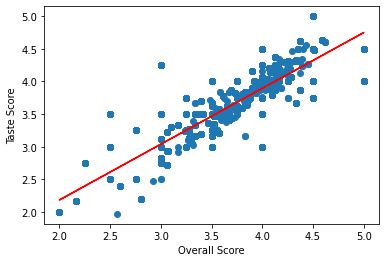

In [162]:
# Are beers with more reviews also better tasting?

x = merged_name_brand["review_overall"].astype(float)
y = merged_nb_df["review_taste"]

# Find slope and y-intercept of line of best fit
m,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.xlabel("Overall Score")
plt.ylabel("Taste Score")
plt.plot(x,m*x+b, color = 'red')


## Machine Learning!!

In [163]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [164]:
# Check for and count duplicate rows
len(merged_nb_df)-len(merged_nb_df.drop_duplicates())

84

In [165]:
# Drop duplicates
merged_nb_df = merged_nb_df.drop_duplicates()

In [166]:
# See what categories are non-numeric
cat_col = merged_nb_df.select_dtypes(include = object).columns

In [167]:
# Let's check out our categorical features
merged_nb_df[cat_col].nunique(axis=0)

name             112
style             90
sugarscale         2
brewmethod         4
primingmethod     29
primingamount     35
beer_style        63
dtype: int64

In [168]:
# check out sugarscale
merged_nb_df["sugarscale"].value_counts()

Specific Gravity    10778
Plato                 216
Name: sugarscale, dtype: int64

In [169]:
# Check out brewmethod
merged_nb_df["brewmethod"].value_counts()


All Grain       7456
BIAB            2199
extract          870
Partial Mash     469
Name: brewmethod, dtype: int64

In [170]:
# Check out primingmethod
# merged_nb_df["primingmethod"].value_counts()

In [171]:
# Check out primingamount
# merged_nb_df["primingamount"].value_counts()

In [172]:
# Categories for One Hot Encoder: sugarscale, brewmethod
cat_var = ["sugarscale", "brewmethod", ]

# Categories to drop (maybe): primingmethod (too many rows are 0), primingamount (too many zero)
merged_nb_df = merged_nb_df.drop(columns = ["name", "style", "styleid", "beer_style", "primingmethod", "primingamount"])

# Also drop the other review categories
merged_nb_df = merged_nb_df.drop(columns = ["review_aroma", "review_appearance", "review_palate", "review_count"])

In [173]:
merged_nb_df.head()

,size_l,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,review_taste,beer_abv
0,18.93,1.082,1.013,9.10,0.00,4.10,21.58,60.0,0.000,72.0,0.0,Specific Gravity,All Grain,0.00,0.00,4.103825,7.6
1,7.57,1.076,1.014,8.10,33.51,3.68,8.71,60.0,1.066,75.0,0.0,Specific Gravity,All Grain,0.00,0.00,4.103825,7.6
2,20.82,1.043,1.011,4.14,13.22,17.67,28.39,90.0,0.000,85.0,0.0,Specific Gravity,All Grain,1.75,12.22,3.028652,4.4
3,22.71,1.069,1.017,6.75,58.76,40.00,29.34,90.0,1.053,70.0,0.0,Specific Gravity,All Grain,0.00,0.00,4.265971,6.4
4,22.71,1.068,1.018,6.53,73.40,40.00,27.44,90.0,1.056,65.0,1.3,Specific Gravity,All Grain,1.25,18.89,4.265971,6.4


In [174]:
# Use OneHotEncoder to encode our categorical variables
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged_nb_df[cat_var]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_var)
encode_df.head()

,sugarscale_Plato,sugarscale_Specific Gravity,brewmethod_All Grain,brewmethod_BIAB,brewmethod_Partial Mash,brewmethod_extract
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0


In [175]:
# Merge one-hot encoded features and drop the originals
merged_nb_df = merged_nb_df.merge(encode_df, left_index = True, right_index=True)
merged_nb_df = merged_nb_df.drop(cat_var,1)
merged_nb_df.head()

<ipython-input-175-03dc4cab549e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged_nb_df = merged_nb_df.drop(cat_var,1)


,size_l,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,mashthickness,pitchrate,primarytemp,review_taste,beer_abv,sugarscale_Plato,sugarscale_Specific Gravity,brewmethod_All Grain,brewmethod_BIAB,brewmethod_Partial Mash,brewmethod_extract
0,18.93,1.082,1.013,9.10,0.00,4.10,21.58,60.0,0.000,72.0,0.0,0.00,0.00,4.103825,7.6,0.0,1.0,1.0,0.0,0.0,0.0
1,7.57,1.076,1.014,8.10,33.51,3.68,8.71,60.0,1.066,75.0,0.0,0.00,0.00,4.103825,7.6,0.0,1.0,1.0,0.0,0.0,0.0
2,20.82,1.043,1.011,4.14,13.22,17.67,28.39,90.0,0.000,85.0,0.0,1.75,12.22,3.028652,4.4,0.0,1.0,1.0,0.0,0.0,0.0
3,22.71,1.069,1.017,6.75,58.76,40.00,29.34,90.0,1.053,70.0,0.0,0.00,0.00,4.265971,6.4,0.0,1.0,1.0,0.0,0.0,0.0
4,22.71,1.068,1.018,6.53,73.40,40.00,27.44,90.0,1.056,65.0,1.3,1.25,18.89,4.265971,6.4,0.0,1.0,1.0,0.0,0.0,0.0


In [176]:
# # Let's drop some more arbritrary columns
# merged_nb_df = merged_nb_df.drop(columns = ["size_l", "abv", "boiltime", "boilgravity", 
# "mashthickness", "pitchrate", "primarytemp", "sugarscale_Plato", "sugarscale_Specific Gravity", 
# "brewmethod_All Grain","brewmethod_BIAB", "brewmethod_Partial Mash", "brewmethod_extract"])

# Split our preprocessed data into our features and target arrays
y = merged_nb_df.review_taste.values
X = merged_nb_df.drop(columns = ["review_taste"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [177]:
# Create LR model
print (f"This LR model uses the following features: {merged_nb_df.columns.tolist()}")
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

This LR model uses the following features: ['size_l', 'og', 'fg', 'abv', 'ibu', 'color', 'boilsize', 'boiltime', 'boilgravity', 'efficiency', 'mashthickness', 'pitchrate', 'primarytemp', 'review_taste', 'beer_abv', 'sugarscale_Plato', 'sugarscale_Specific Gravity', 'brewmethod_All Grain', 'brewmethod_BIAB', 'brewmethod_Partial Mash', 'brewmethod_extract']


In [178]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_pred)
print(f"R2 score is: {score}")
print(f"Mean Squared Error is: {mean_squared_error(y_test,y_pred)}")

R2 score is: 0.02596253192497089
Mean Squared Error is: 0.303999963681997


In [186]:
# So... none of the things I've tried have worked well - what if we classify the data into "good" beer or "not good" beer
# I'll do that in a separate notebook

merged_nb_df.to_csv("merged_nb_df.csv", index = False)